In [1]:
import yfinance as yf

# VIX는 투자자들이 향후 30일간 S&P 500지수가 얼마나 변동할 것인지를 반영한 지수이다.
# 투자자들이 투자 결정을 내리기 전에 시장 리스크, 공포 및 스트레스를 측정하는 데 사용한다.
columns = ['GLD', 'SBUX']

f_df = yf.download(columns, start='2018-01-02')['Adj Close'].round(5)
f_df

[*********************100%%**********************]  2 of 2 completed


Ticker,GLD,SBUX
Date,,
2018-01-02,125.15000,50.29491
2018-01-03,124.82000,51.23745
2018-01-04,125.46000,51.42944
2018-01-05,125.33000,52.02289
2018-01-08,125.31000,51.76107
...,...,...
2024-06-10,213.53999,81.60000
2024-06-11,214.14999,79.89000
2024-06-12,214.72000,79.38000


In [2]:
f_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1624 entries, 2018-01-02 to 2024-06-14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GLD     1624 non-null   float64
 1   SBUX    1624 non-null   float64
dtypes: float64(2)
memory usage: 38.1 KB


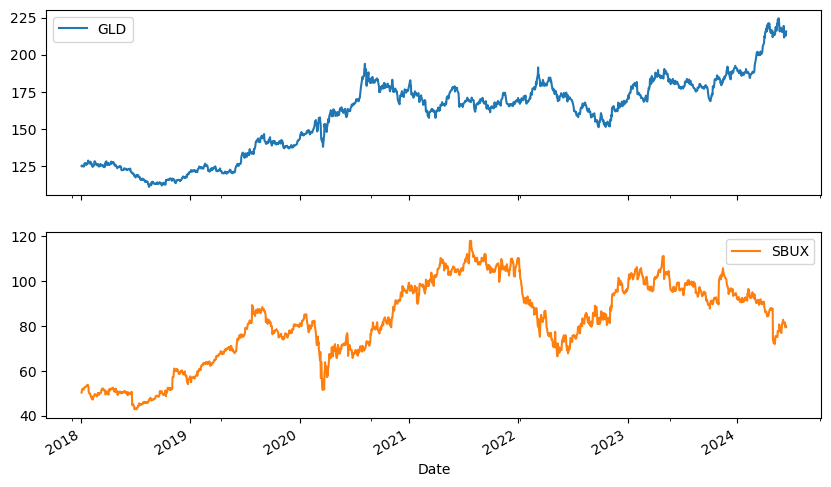

In [3]:
import matplotlib.pyplot as plt

f_df.plot(figsize=(10, 6), subplots=True)
plt.show()

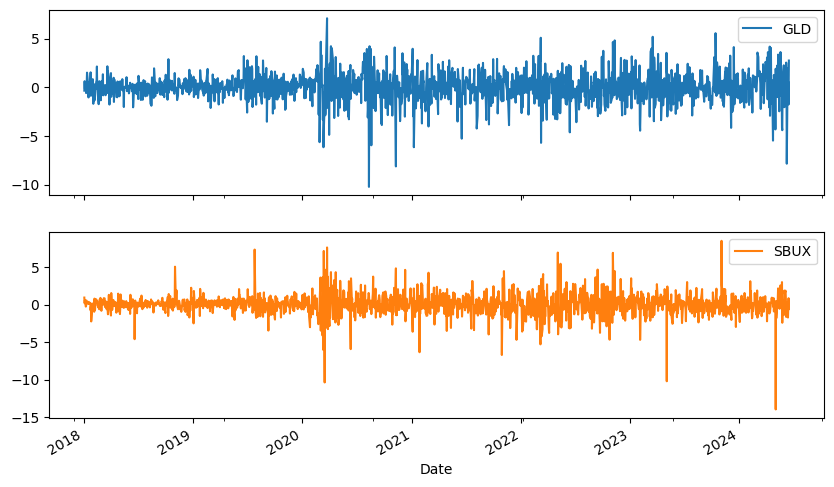

In [4]:
# 차분한 변화값
f_df.diff().plot(figsize=(10, 6), subplots=True)
plt.show()

차분한 뒤, 변화값을 시각화해보았다.   
분산이 일정한 금에 비해 스타벅스의 분산이 조금 더 퍼져있는 것으로 보아 안정성이 조금 낮다는 것을 확인할 수 있었다.

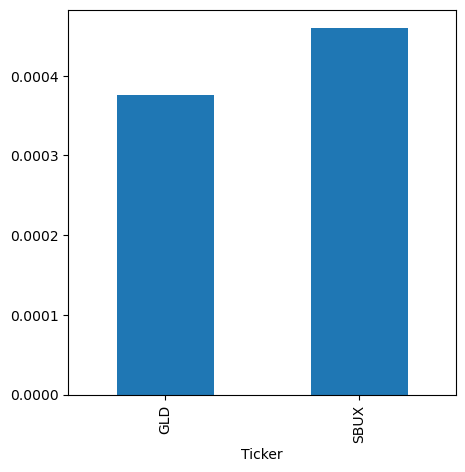

In [5]:
# 변화율
f_df.pct_change().mean().plot(kind='bar', figsize=(5, 5))
plt.show()

금에 비해 스타벅스의 변화율이 더 높다는 것을 바그래프을 통해 시각화하여 확인하였다.

In [6]:
# 한 행 이동 후 상위4개 -> 수익률 계산하기 위함
display(f_df.shift(1).head(4))
display(f_df.head(4))

Ticker,GLD,SBUX
Date,,
2018-01-02,NaN,NaN
2018-01-03,125.15,50.29491
2018-01-04,124.82,51.23745
2018-01-05,125.46,51.42944


Ticker,GLD,SBUX
Date,,
2018-01-02,125.15,50.29491
2018-01-03,124.82,51.23745
2018-01-04,125.46,51.42944
2018-01-05,125.33,52.02289


현재 시점에서 다음날을 통해 현재의 수익률을 계산하기 위해 shift를 사용하였다.

In [7]:
import numpy as np

# 수익률을 계산하기 위해 행 하나 이동하여 맞춰줌
# log까지 취해서 계산하기 편하게 바꿔줌
# 수익률 df 생성
rate_f_df = np.log(f_df / f_df.shift(1))
rate_f_df

Ticker,GLD,SBUX
Date,,
2018-01-02,NaN,NaN
2018-01-03,-0.002640,0.018567
2018-01-04,0.005114,0.003740
2018-01-05,-0.001037,0.011473
2018-01-08,-0.000160,-0.005045
...,...,...
2024-06-10,0.009126,0.002086
2024-06-11,0.002853,-0.021179
2024-06-12,0.002658,-0.006404


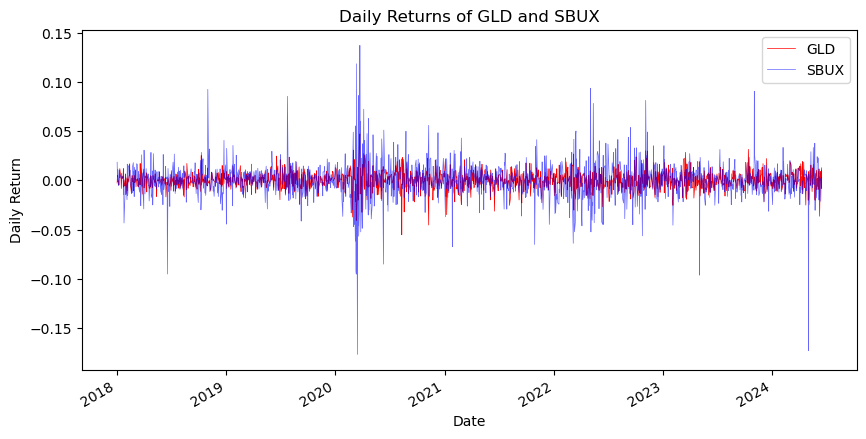

In [8]:
# 일간 수익률
# lw = line width
colors = ['red', 'blue']

# GLD와 SBUX 일간 수익률 그리기
rate_f_df['GLD'].plot(figsize=(10, 5), label='GLD', color=colors[0], lw=0.5)
rate_f_df['SBUX'].plot(figsize=(10, 5), label='SBUX', color=colors[1], lw=0.5, alpha=0.6)

# 그래프 제목 및 레이블 설정
plt.title('Daily Returns of GLD and SBUX')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()

금과 스타벅스의 일간 수익률의 차이를 보았을 때,  
수익률이 일정한 금에 비해 스타벅스는 2020년 상반기와 2024년 중반기에 큰 차이가 나타남을 볼 수 있었다. 

In [9]:
# 각 feature별 연율화
# 연간 영업일(약 252일로 계산)
rate_f_df.mean() * 252

Ticker
GLD     0.084546
SBUX    0.071383
dtype: float64

연간 영업일인 252일을 기준으로 수익률을 내보았을 때, 평균값에 큰 차이는 없었지만 스타벅스보다 0.01정도 더 높은 수치를 보였다.

In [10]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 공분산 함수
def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [11]:
rate_f_df = rate_f_df.dropna()
get_vif(rate_f_df)

,vif_score,feature
0,1.001356,GLD
1,1.001356,SBUX


금과 스타벅스의 상관관계를 파악하기 위해 둘의 다중 공산성을 확인해보았다.  
수치가 낮은 것으로 보아 둘은 독립적이며 큰 상관관계는 없음을 확인할 수 있었다.

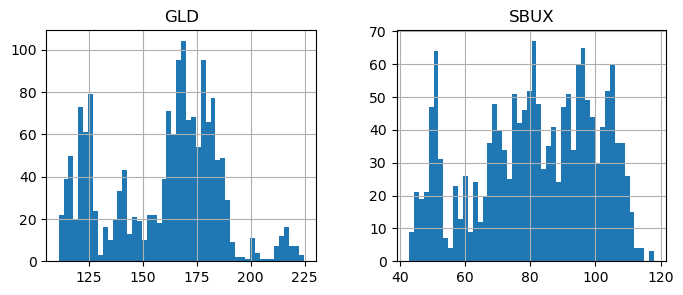

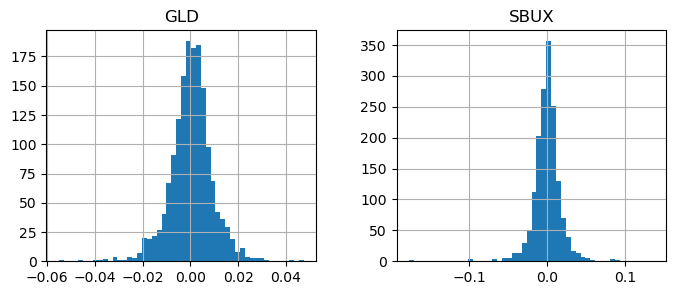

In [12]:
f_df.hist(figsize=(8, 3), bins=50)
rate_f_df.hist(figsize=(8, 3), bins=50)
plt.show()

로그를 취하기 전(1열)과 후(2열)의 그래프이다.  
확실히 로그를 취한 후의 분포가 상대적으로 정규분포 형태를 띄고 있다. 로그를 취해서 분포를 맞춰주는 것이 좋다는 것을 확인했다.

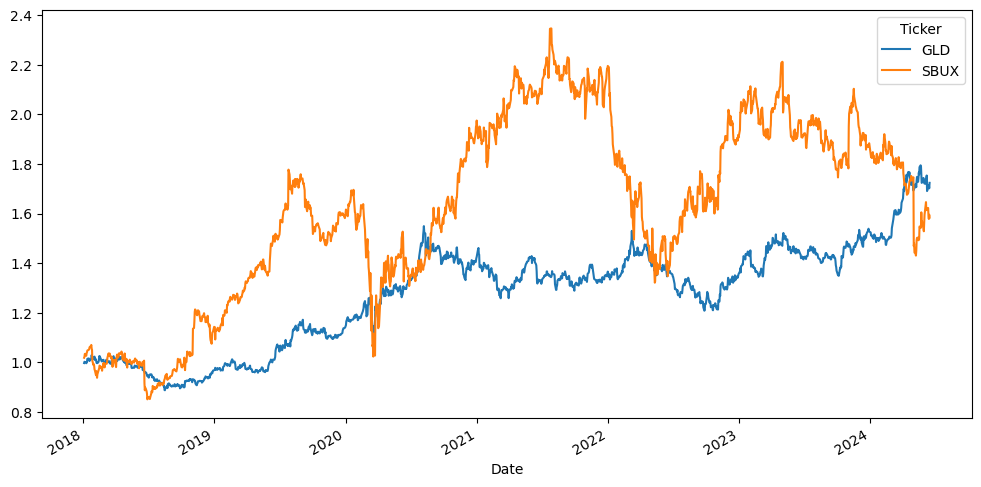

In [13]:
# 일간 수익률
# cumsum(): 각 원소들의 누적합
# exp: 로그 취했던 것 다시 지수 취해줌
rate_f_df.cumsum().apply(np.exp).plot(figsize=(12, 6))
plt.show()

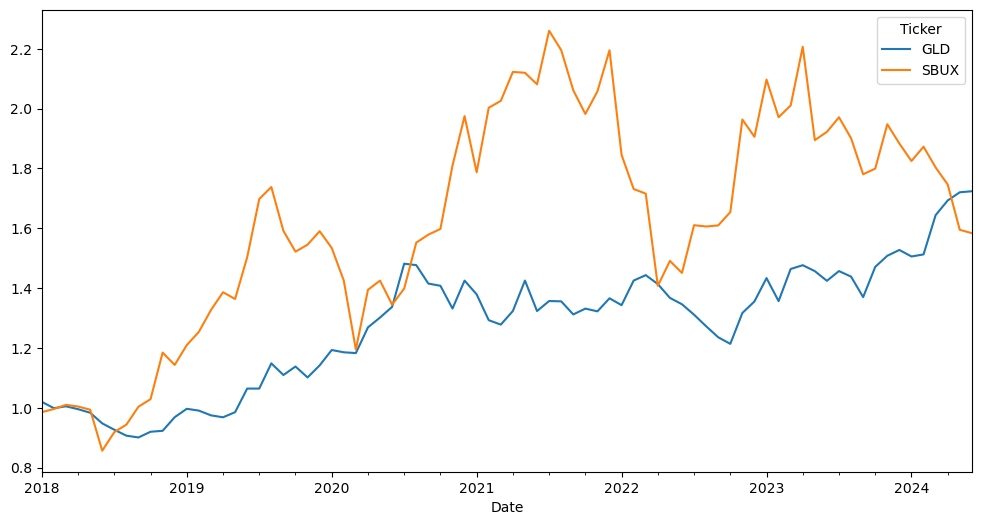

In [14]:
# 월간 수익률
# last(): 1개월 단위 중 마지막 것이 결과
rate_f_df.cumsum().apply(np.exp).resample('1m').last().plot(figsize=(12, 6))
plt.show()

cumsum을 사용해 일자별로 수익률을 누적한 값으로 일간 및 월간 수익률 그래프를 시각화해 보았다.  
일자별 과정 중 가장 마지막 값을 사용하기 위해 last를 사용하여 월간 수익률을 나타냈으며, 확실히 조금 더 스무딩된 것을 볼 수 있었다.

2020년에 확 낮아졌다가 2021년 중반까지 최고치로 증가하였다.  
이는 코로나19 영향으로 인해 수익이 감소하였었으나, 배달과 테이크아웃 비중을 늘리며 차차 회복했으며,  
백신이 나온 이후 회복을 하여 좋은 매출을 기록한 것으로 보인다.  
2024년 상반기에는 갑작스런 하락을 볼 수 있었는데, 이는 중동 전쟁이후 친이스라엘 기업으로 분류되며 불매운동이 진행된 탓으로 보인다.  
아래는 실제 기사이다.

#### 코로나19 영향으로 매출 감소에 대한 기사
<img src="./images/starbucks01.png" width="500px"> <img src="./images/starbucks02.png" width="500px">
#### 회복하는 과정의 기사
<img src="./images/starbucks03.png" width="500px"> <img src="./images/starbucks04.png" width="500px">
#### 2024년 상반기 매출 감소에 대한 기사
<img src="./images/starbucks05.png" width="500px">
<img src="./images/starbucks06.png" width="500px">

In [15]:
sbux_df = f_df[['SBUX']].dropna()
sbux_df

Ticker,SBUX
Date,
2018-01-02,50.29491
2018-01-03,51.23745
2018-01-04,51.42944
2018-01-05,52.02289
2018-01-08,51.76107
...,...
2024-06-10,81.60000
2024-06-11,79.89000
2024-06-12,79.38000


In [16]:
window = 20

# 20일 단위로 구한 (1~20일, 2~21일..)
# 최소 평균 최대값
sbux_df['min'] = sbux_df['SBUX'].rolling(window=window).min()
sbux_df['mean'] = sbux_df['SBUX'].rolling(window=window).mean()
sbux_df['max'] = sbux_df['SBUX'].rolling(window=window).max()

sbux_df.dropna()

Ticker,SBUX,min,mean,max
Date,,,,
2018-01-30,49.91092,49.76255,52.094456,53.83815
2018-01-31,49.57928,49.57928,52.058674,53.83815
2018-02-01,48.87236,48.87236,51.940419,53.83815
2018-02-02,48.67165,48.67165,51.802530,53.83815
2018-02-05,47.72911,47.72911,51.587841,53.83815
...,...,...,...,...
2024-06-10,81.60000,75.06052,78.797845,82.79000
2024-06-11,79.89000,75.06052,79.012026,82.79000
2024-06-12,79.38000,75.13000,79.228000,82.79000


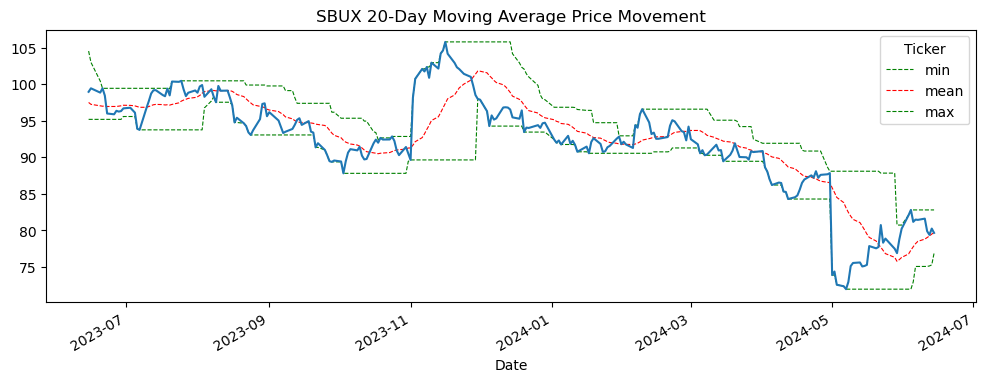

In [17]:
import matplotlib.pyplot as plt

ax = sbux_df[['min', 'mean', 'max']].iloc[-252:].plot(figsize=(12, 4), style=['g--', 'r--', 'g--'], lw=0.8)
sbux_df['SBUX'].iloc[-252:].plot(ax=ax)
plt.title("SBUX 20-Day Moving Average Price Movement")
plt.show()

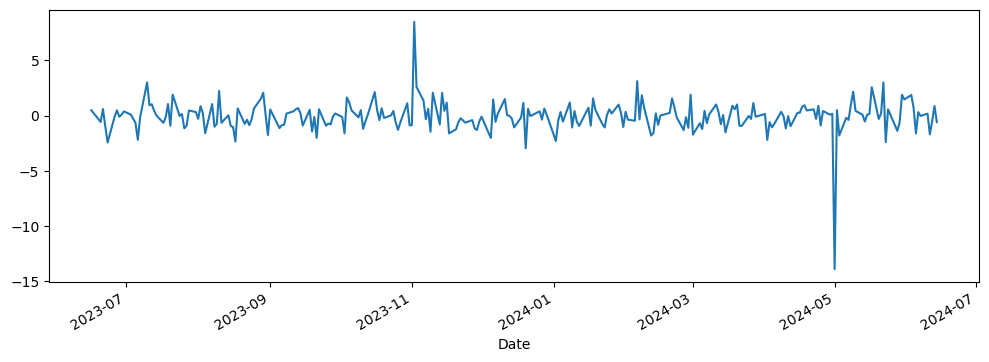

In [18]:
# 차분한 변화값
sbux_df['SBUX'].iloc[-252:].diff().plot(figsize=(12, 4), subplots=True)
plt.show()

<상단 그래프>  
SBUX 주가의 20일 이동 평균을 bias에 민감하지 않도록 평균값을 사용하여 시각화하였다.   
2023년 11월에는 실제 주가가 이동 평균보다 높은 것으로 보아 상승세를 나타냈으며, 2024년 5월에는 실제 주가가 이동 평균보다 낮은 수치를 보이는 것으로 보아 하락세를 나타냄을 확인했다.    
<하단 그래프>  
주가의 일간 변화를 나타내는 차분값(diff)을 보여주는 그래프이다.  
이를 통해 변동량이 큰 2023년 11월과 2024년 5월에 초점을 맞추어 보았다.  
2023년 11월에는 변동량이 양수 값을 보였다. 이는 주가가 전날보다 큰 폭으로 상승했음을 보여준다.  
2024년 5월에는 변동량이 음수 값을 보였으며, 이는 주가가 전날보다 큰 폭으로 하락했음을 보여준다.

In [19]:
# SMA(Simple Moving Average): 일정 기간동안의 가격의 평균을 나타내는 보조지표
# 1달 영업일을 21일로 가정, 1년 영업일을 252일로 가정

# 단기
sbux_df['SMA1'] = sbux_df['SBUX'].rolling(window=21).mean() #short-term
#장기
sbux_df['SMA2'] = sbux_df['SBUX'].rolling(window=252).mean() #long-term
sbux_df[['SBUX', 'SMA1', 'SMA2']].tail()

Ticker,SBUX,SMA1,SMA2
Date,,,
2024-06-10,81.60,78.642562,92.215982
2024-06-11,79.89,78.849852,92.153628
2024-06-12,79.38,79.029549,92.087315
2024-06-13,80.24,79.276190,92.021316
2024-06-14,79.65,79.491429,91.947554


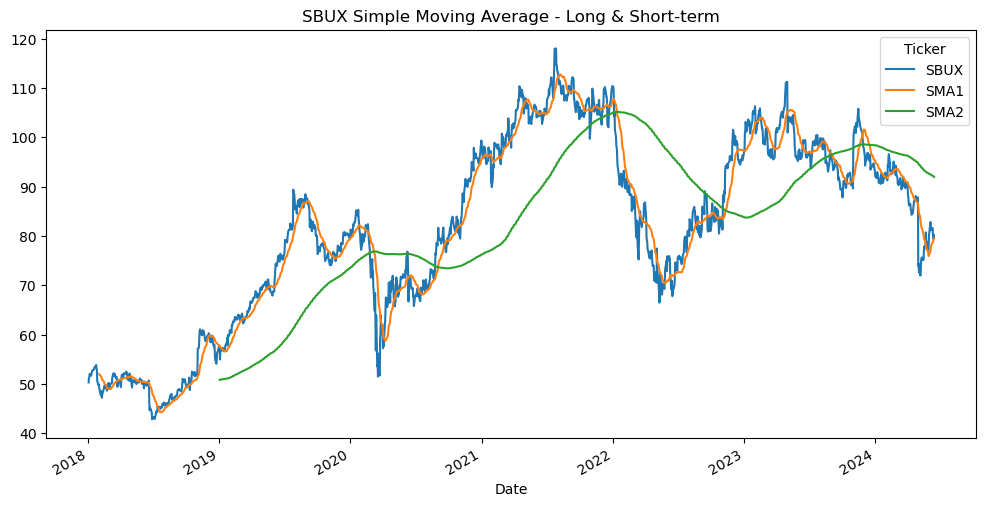

In [20]:
sbux_df[['SBUX', 'SMA1', 'SMA2']].plot(figsize=(12, 6))
plt.title("SBUX Simple Moving Average - Long & Short-term")
plt.show()

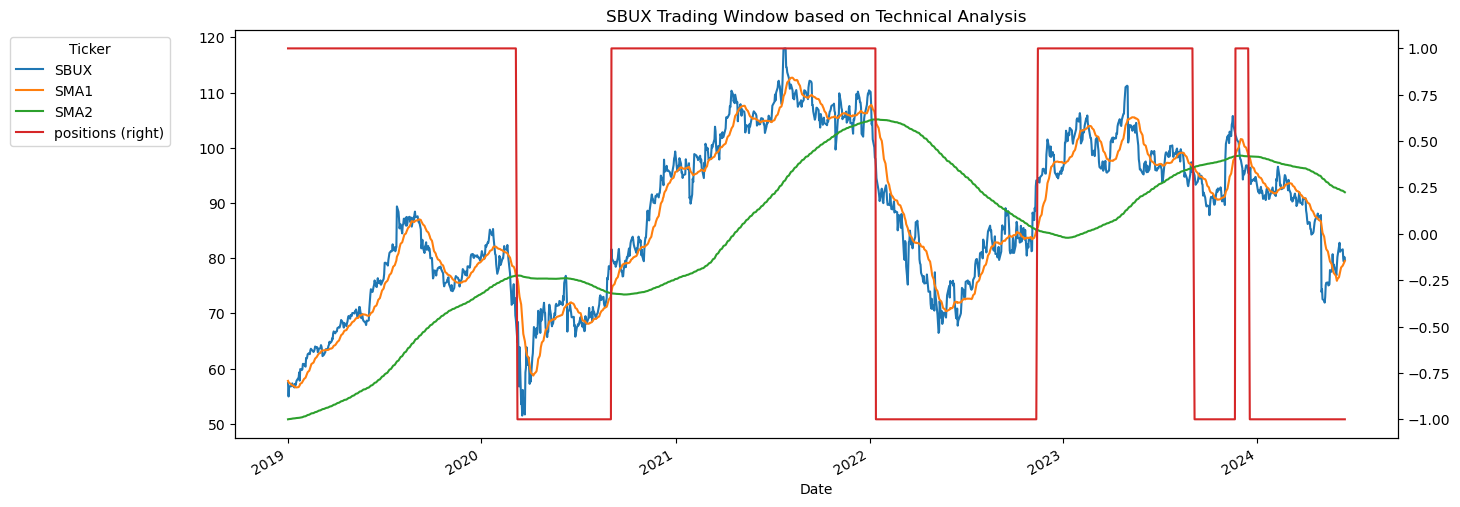

In [21]:
# 스타벅스 주가 기술 분석
# 골든 크로스, 데드 크로스
sbux_df.dropna(inplace=True)

sbux_df['positions'] = np.where(sbux_df['SMA1'] > sbux_df['SMA2'], 1, -1)  # 1: buy , -1: sell /

ax = sbux_df[['SBUX', 'SMA1', 'SMA2', 'positions']].plot(figsize=(15, 6), secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((-0.05, 1))

plt.title("SBUX Trading Window based on Technical Analysis")
plt.show()

일정 기간동안의 가격의 평균을 나타내는 보조지표인 SMA(Simple Moving Average)을 이용하여 단기(21일)와 장기(252일) 이동 평균 그래프를 시각화하였다.  
해당 그래프가 교차하는 지점을 통해 골든 크로스 인지, 데드 크로스 인지를 확인할 수 있었다.  
[마지막 그래프의 빨간선 하단 시기]  
단기 이동 평균선(SMA1)이 장기 이동 평균선(SMA2)을 위에서 아래로 교차할 때 발생하는 데드 크로스 시기에 주식을 사고,  
[마지막 그래프의 빨간선 상단 시기]  
단기 이동 평균선(SMA1)이 장기 이동 평균선(SMA2)을 아래에서 위로 교차할 때 발생하는 골든 크로스 시기에 이를 팔아야한다.   

### 예측 시작
최근 1년 데이터만 가져와서 데이터를 예측

In [22]:
sbux_df = f_df[['SBUX']].iloc[-252:]
sbux_df

Ticker,SBUX
Date,
2023-06-15,98.94070
2023-06-16,99.41893
2023-06-20,98.83335
2023-06-21,99.41893
2023-06-22,98.42346
...,...
2024-06-10,81.60000
2024-06-11,79.89000
2024-06-12,79.38000


trian, test나누기

In [23]:
# 단변량이므로 y만 train과 test로 나누기(random하게 섞이면 안되므로 80% 20%로 나눔)
y_train = sbux_df['SBUX'][:int(0.8 * len(sbux_df))]
y_test = sbux_df['SBUX'][int(0.8 * len(sbux_df)):]

전체 그래프 확인

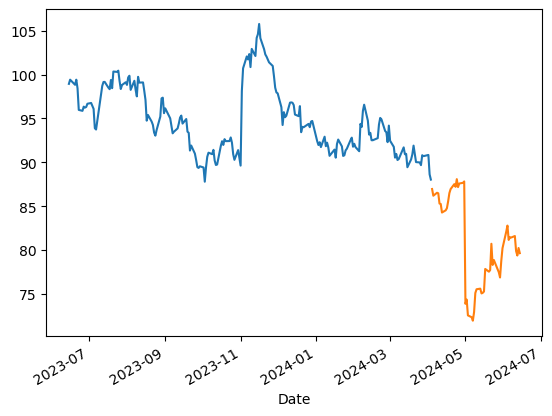

In [24]:
y_train.plot()
y_test.plot()
plt.show()

#### acf, pacf 사용

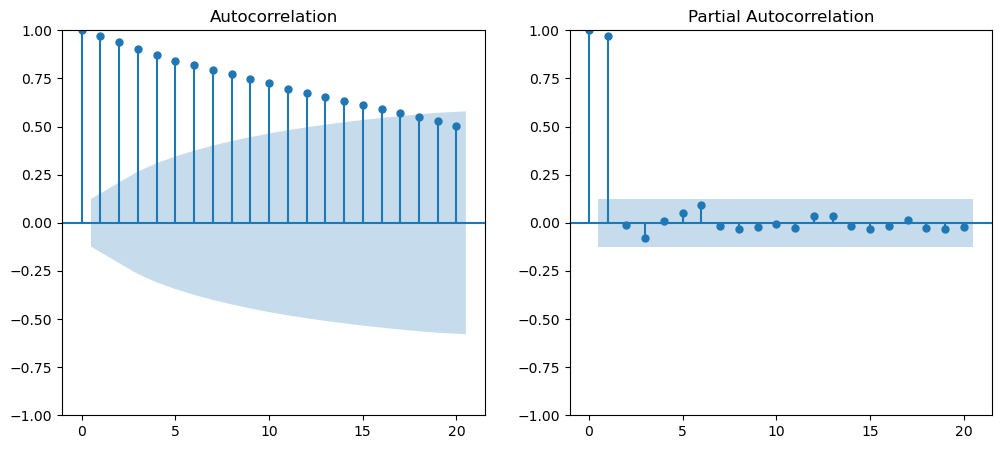

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

fig = plot_acf(sbux_df, lags=20, ax=ax[0])
fig = plot_pacf(sbux_df, lags=20, ax=ax[1])

acf그래프를 통해 비정상 데이터임을 확인했으며, 차분을 한뒤 정상성을 띄는지 pacf 그래프를 확인해보고자 한다.  

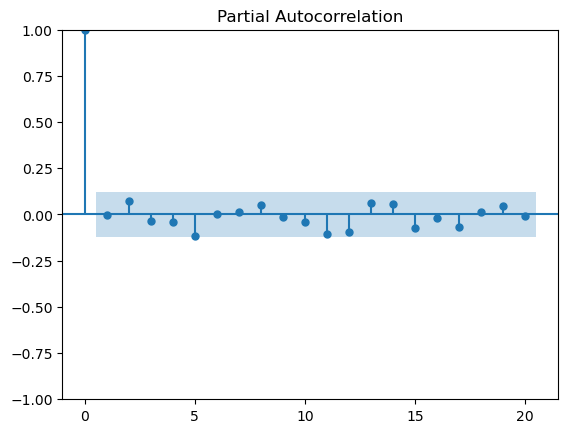

In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_pacf(sbux_df.diff().dropna(), lags=20)
plt.show()

차분한 뒤의 그래프가 첫번째 이후로 급격히 0에 수렴하며, 대부분의 수치가 신뢰구간 내에 들어가는 것으로 보아 1차 차분 후에 정상성을 보인다는 것을 확인할 수 있었다. 

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Prog

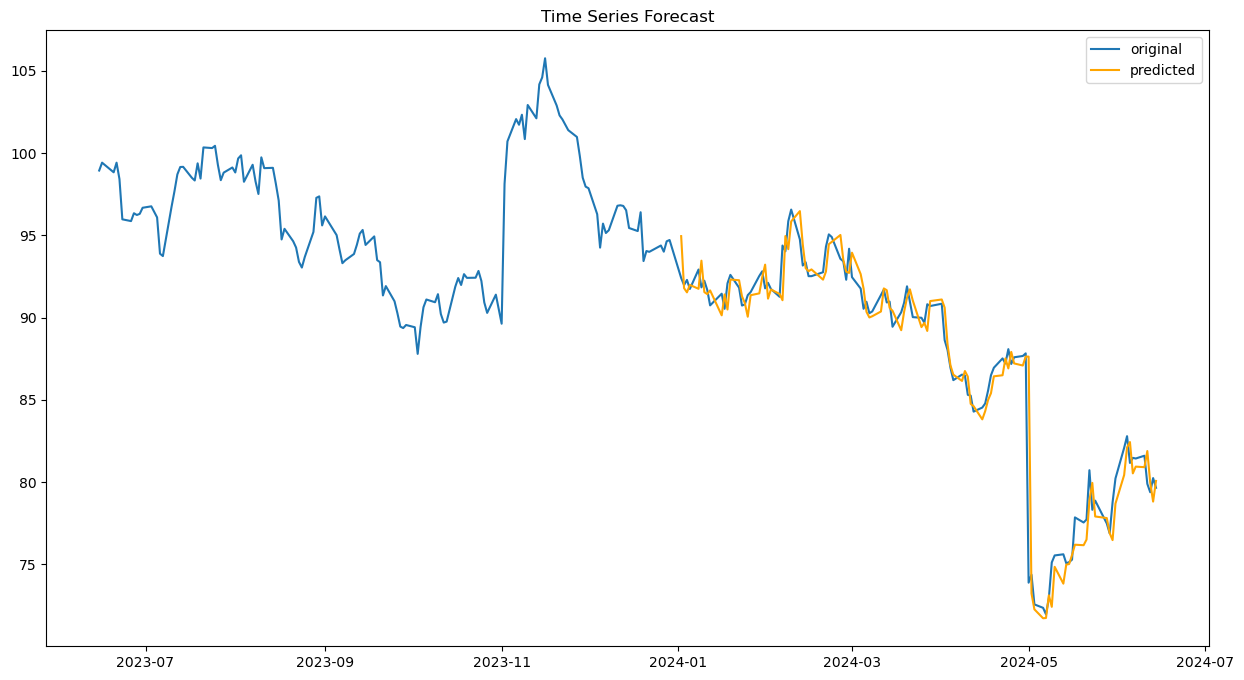

In [27]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(sbux_df, order=(1, 4, 21))
model_fit = model.fit()

start_index = pd.to_datetime('2024-01-02')
end_index = pd.to_datetime('2024-06-14')
forecast = model_fit.predict(start=start_index, end=end_index)

plt.figure(figsize=(15, 8))
plt.plot(sbux_df, label='original')
plt.plot(forecast, label='predicted', c='orange')
plt.title("Time Series Forecast")
plt.legend()
plt.show()

In [28]:
sbux_df.tail()

Ticker,SBUX
Date,
2024-06-10,81.60
2024-06-11,79.89
2024-06-12,79.38
2024-06-13,80.24
2024-06-14,79.65


In [29]:
forecast.tail()

Date
2024-06-10    80.903591
2024-06-11    81.884634
2024-06-12    79.969728
2024-06-13    78.812278
2024-06-14    80.067594
Name: predicted_mean, dtype: float64

In [30]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error

# 1, 1, 21
# Mean Squared Error 2.627447152367955
# Mean Squared Error 2.627447152367955

# 4, 1, 21
# Mean Squared Error 2.592929884439406
# Mean Squared Log Error 2.592929884439406

# 1, 4, 21
# Mean Squared Error 2.734077509915336
# Mean Squared Log Error 2.734077509915336

mse = mean_squared_error(sbux_df['2024-01-02':'2024-06-14'], forecast)
print("Mean Squared Error", mse)

mse = mean_squared_error(sbux_df['2024-01-02':'2024-06-14'], forecast)
print("Root Mean Squared Error", mse ** (1/2))

msle = mean_squared_error(sbux_df['2024-01-02':'2024-06-14'], forecast)
print("Mean Squared Log Error", msle)

Mean Squared Error 2.7327149267541886
Root Mean Squared Error 1.6530925342382345
Mean Squared Log Error 2.7327149267541886


order=(4, 1, 21) 일때가 가장 낮은 손실값을 보였으며, 이 모델이 가장 좋은 모델이라고 보았다.  
p=4: 현재 시점의 데이터가 이전 4개의 시차 데이터에 의존한다. 즉, 이전 시점의 값이 현재 값에 영향을 미친다.    
d=1: 1차 차분을 수행하여 데이터의 정상성을 유지합니다.  
q=21: 21차 이동 평균 항을 포함하여 이전 21개의 오차 항이 현재 값에 영향을 미친다.

#### arima

In [31]:
from pmdarima.arima import ndiffs

kpss_diffs = ndiffs(y_train, alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(y_train, alpha=0.05, test='adf', max_d=6)
pp_diffs = ndiffs(y_train, alpha=0.05, test='pp', max_d=6)

n_diffs = max(kpss_diffs, adf_diffs, pp_diffs)

print(f'd = {n_diffs}')

d = 1


In [32]:
import pmdarima as pm

model = pm.auto_arima(y = y_train, 
                      d=1, 
                      start_p=0, max_p=5, 
                      start_q=0, max_q=30, 
                      m=1, 
                      stepwise=True, 
                      trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=647.941, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=649.728, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=649.743, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=646.346, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=651.677, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.103 seconds


In [33]:
model.fit(y_train)

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [34]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  201
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -322.173
Date:                Mon, 17 Jun 2024   AIC                            646.346
Time:                        13:45:33   BIC                            649.645
Sample:                             0   HQIC                           647.681
                                - 201                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         1.4679      0.058     25.437      0.000       1.355       1.581
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):              1180.63
Prob(Q):                              0.64   Pr

- Prob(Q), 융-박스 검정 통계량  
  > 0.64로 0.05 이상의 값을 가진다.  
  > 이 데이터는 서로 독립이고 동일한 분포를 따른다고 할 수 있다.  
- Prob(H), 이분산성 검정 통계량  
  > 0.71로 0.05 이상의 값을 가진다.  
  > 이 데이터는 잔차의 분산이 일정하다고 할 수 있다.  
  > Low risk-low return 상품으로 보인다.  
- Prob(JB), 자크-베라 검정 통계량  
  > 0으로 0.05이하의 값을 가진다.  
  > 이 데이터는 평균과 분산이 일정하지 않다는 것을 알 수 있다.  
  > 일정부분의 잔차가 큰 것으로 보인다.  
- Skew, 왜도/쏠린정도  
  > 1.84로 0에 가까운 정도를 보인다.  
  > 일정 부분에 쏠리지 않은 데이터임을 알 수 있다.  
- Kurtosis, 첨도/뾰족한 정도  
  > 14.32로 3보다 큰 값을 가진다.  
  > 몇 부분의 수익률이 매우 높거나 낮은 곳이 있을 것으로 보인다.   

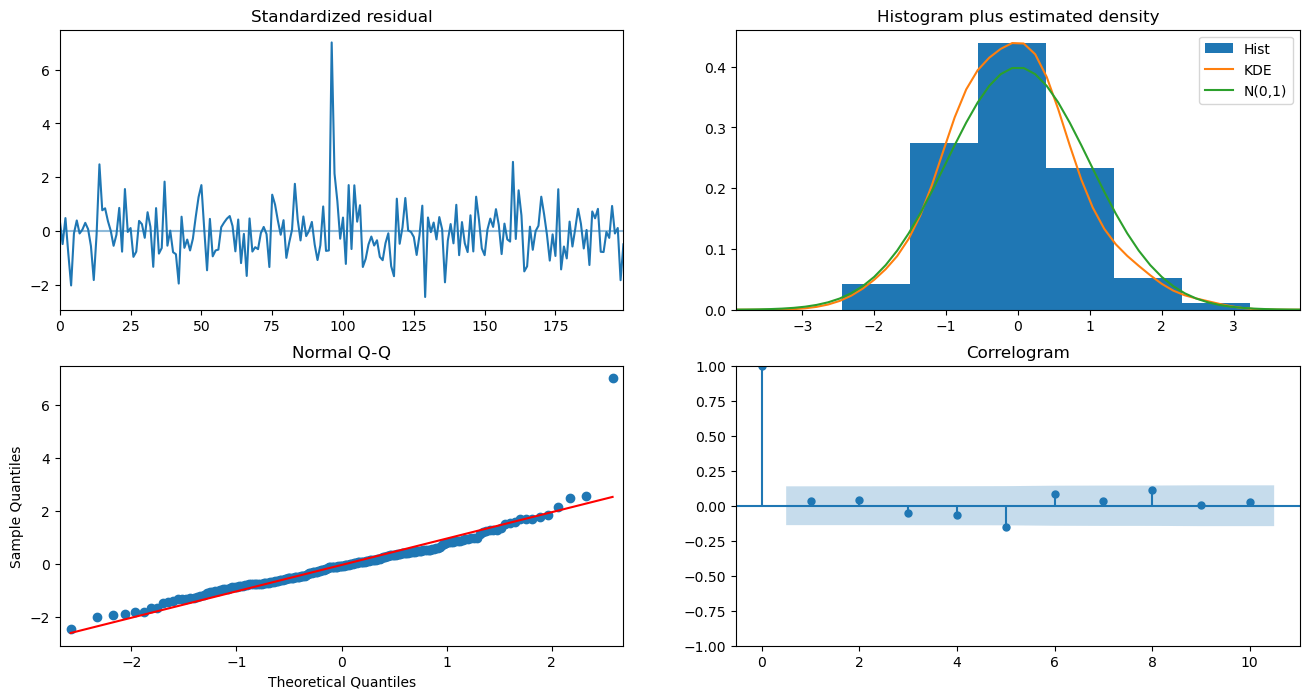

In [35]:
import matplotlib.pyplot as plt

# 위의 summary에 관한 시각화 진행
model.plot_diagnostics(figsize=(16, 8))
plt.show()

#### 그래프 분석
- 잔차 그래프: 90일 이전 시점에 잔차의 분산이 확 오른 부분이 있지만, 대부분 일정한 분산을 지니고 있다.
- 정규 분포 그래프에 비해서 현재 데이터가 더 첨도가 높다.
- Noraml Q-Q plot 그래프를 살펴보면, fat-tail이 나타나는 부분은 크게 없는 것으로 보인다.  
  > 현재 모델의 분포 그래프와 정규 분포 그래프를 비교해보면, 왼편과 오른편에서 현재 모델과 정규 분포 그래프의 모델의 차이가 별로 없어서로 보인다.
- 자기상관 그래프를 보면, 첫번째 이후 급격히 0에 가까워지며, 범위에서 벗어나는 부분이 거의 없는 것을 볼 수 있다.  
  > 해당 그래프를 통해 현재 모델은 정상성을 띄고 있는 모델임을 알 수 있다.

In [36]:
# y_test의 주기로 예측
prediction = model.predict(n_periods=len(y_test))
prediction

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


201    88.03211
202    88.03211
203    88.03211
204    88.03211
205    88.03211
206    88.03211
207    88.03211
208    88.03211
209    88.03211
210    88.03211
211    88.03211
212    88.03211
213    88.03211
214    88.03211
215    88.03211
216    88.03211
217    88.03211
218    88.03211
219    88.03211
220    88.03211
221    88.03211
222    88.03211
223    88.03211
224    88.03211
225    88.03211
226    88.03211
227    88.03211
228    88.03211
229    88.03211
230    88.03211
231    88.03211
232    88.03211
233    88.03211
234    88.03211
235    88.03211
236    88.03211
237    88.03211
238    88.03211
239    88.03211
240    88.03211
241    88.03211
242    88.03211
243    88.03211
244    88.03211
245    88.03211
246    88.03211
247    88.03211
248    88.03211
249    88.03211
250    88.03211
251    88.03211
dtype: float64

In [37]:
# 신뢰구간도 전달 후 같이 받기
# 신뢰구간: 범위
# 예측값: 신뢰구간의 정중앙값(평균값)
prediction, conf_int = model.predict(n_periods=1, return_conf_int=True)
print(conf_int)
print(prediction)

[[85.65746135 90.40675865]]
201    88.03211
dtype: float64


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


신뢰구간의 평균값이 예측값으로 나오는 것을 확인하였다.  
한 스텝씩 가야만 예측이 매일 다르게 진행될 수 있다.  
predict한 것을 리턴하여 해당 값으로 다시 업데이트를 하여 다시 예측하는 모델을 학습해야한다.  

In [38]:
# 첫번째 예측값 가져오기
prediction.tolist()[0]

88.03211

In [39]:
def predict_one_step():
    prediction = model.predict(n_periods=1)
    return prediction.tolist()[0]

In [40]:
p_list = []

for data in y_test:
    p = predict_one_step()
    p_list.append(p)

    model.update(data)

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [41]:
y_predict_df = pd.DataFrame({"test": y_test, "pred": p_list})
y_predict_df

,test,pred
Date,,
2024-04-04,86.96025,88.03211
2024-04-05,86.19604,86.96025
2024-04-08,86.53349,86.19604
2024-04-09,86.47393,86.53349
2024-04-10,85.30282,86.47393
2024-04-11,85.25320,85.30282
2024-04-12,84.28057,85.25320
2024-04-15,84.52869,84.28057
2024-04-16,84.77681,84.52869


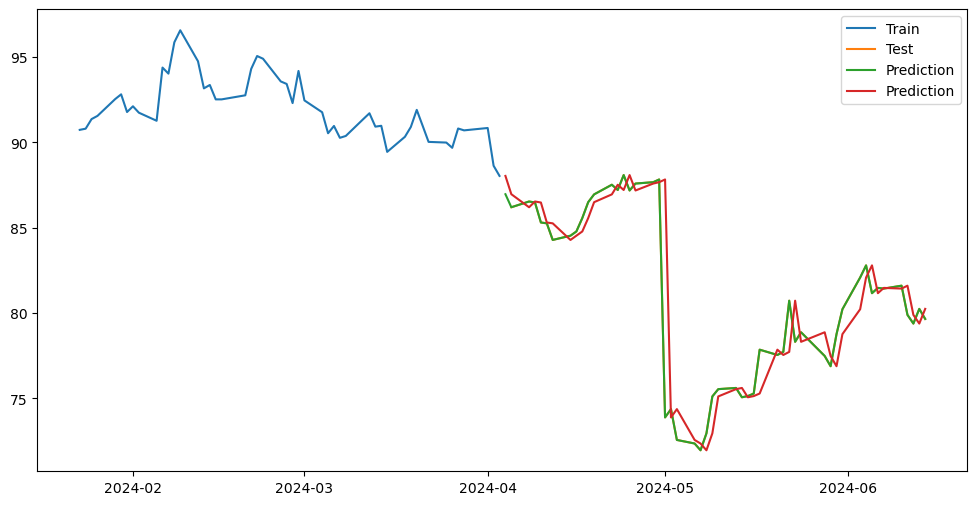

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

# 뒷부분만 확대해서 보기 -> iloc사용
plt.plot(y_train.iloc[-50:], label='Train')
plt.plot(y_test.iloc[-50:], label='Test')
plt.plot(y_predict_df, label='Prediction')
plt.legend()
plt.show()

In [43]:
def MAPE(y_test, y_pred):
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f'MAPE (%): {MAPE(y_test, p_list):.4f}')

MAPE (%): 1.3606


예측한 값과 실제 값 사이의 평균 절대 백분율 오차(MAPE)가 1.3606%이다.  
이는 평균적으로 예측 값이 실제 값의 1.3606% 정도 벗어난다는 것을 의미한다.  
해당 모델은 예측을 잘 수행하였지만, 실제 데이터와 모델의 예측값을 비교하여 잔차를 파악하는 모델로, 실제 예측을 한다기 보다는 모델 평가 정도에 불가하다.  
따라서 prophet을 사용해서 딥러닝을 진행한 모델로 실제 예측을 진행해보고자 한다.

### 딥러닝(Prophet 사용)

In [320]:
import yfinance as yf

columns = ['GLD', 'SBUX']

f_df = yf.download(columns, start='2018-01-01')['Adj Close'].round(5)
f_df

[*********************100%%**********************]  2 of 2 completed


Ticker,GLD,SBUX
Date,,
2018-01-02,125.15000,50.29491
2018-01-03,124.82000,51.23745
2018-01-04,125.46000,51.42944
2018-01-05,125.33000,52.02289
2018-01-08,125.31000,51.76108
...,...,...
2024-06-10,213.53999,81.60000
2024-06-11,214.14999,79.89000
2024-06-12,214.72000,79.38000


In [321]:
sbux_df = f_df[['SBUX']]
sbux_df

Ticker,SBUX
Date,
2018-01-02,50.29491
2018-01-03,51.23745
2018-01-04,51.42944
2018-01-05,52.02289
2018-01-08,51.76108
...,...
2024-06-10,81.60000
2024-06-11,79.89000
2024-06-12,79.38000


In [322]:
import pandas as pd

sbux_df.reset_index(inplace=True)

# Rename the 'Date' column to 'ds'
pre_sbux_df = sbux_df.rename(columns={'Date': 'ds'})
pre_sbux_df = pre_sbux_df.rename(columns={'SBUX': 'y'})

pre_sbux_df

Ticker,ds,y
0,2018-01-02,50.29491
1,2018-01-03,51.23745
2,2018-01-04,51.42944
3,2018-01-05,52.02289
4,2018-01-08,51.76108
...,...,...
1619,2024-06-10,81.60000
1620,2024-06-11,79.89000
1621,2024-06-12,79.38000
1622,2024-06-13,80.24000


In [323]:
train_df = pre_sbux_df.iloc[:int(len(pre_sbux_df) * 0.8)]
train_df

Ticker,ds,y
0,2018-01-02,50.29491
1,2018-01-03,51.23745
2,2018-01-04,51.42944
3,2018-01-05,52.02289
4,2018-01-08,51.76108
...,...,...
1294,2023-02-23,100.51895
1295,2023-02-24,98.66414
1296,2023-02-27,99.47987
1297,2023-02-28,99.13998


In [324]:
# 예측하고 싶은 기간을 적기
future = model.make_future_dataframe(periods=365)

forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][1372:]

,ds,yhat,yhat_lower,yhat_upper
1372,2024-06-14,76.815214,73.544251,79.858685
1373,2024-06-15,76.816265,73.702481,79.800405
1374,2024-06-16,76.637734,73.566537,79.882912
1375,2024-06-17,76.201546,72.829762,79.204884
1376,2024-06-18,75.995849,72.717855,79.290917
...,...,...,...,...
1733,2025-06-10,55.907316,-62.068531,180.440632
1734,2025-06-11,55.774950,-60.908623,181.480246
1735,2025-06-12,55.701261,-61.859968,182.899826
1736,2025-06-13,55.613453,-62.575787,184.123398


In [325]:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
import itertools

# changepoint_prior_scale: trend의 변화하는 크기를 반영하는 정도이다, 0.05가 default
# seasonality_prior_scale: 계절성을 반영하는 단위이다.
# seasonality_mode: 계절성으로 나타나는 효과를 더해 나갈지, 곱해 나갈지 정한다.
search_space = {
    'changepoint_prior_scale': [0.05, 0.1, 0.5, 1.0 ,5.0, 10.0],
    'seasonality_prior_scale': [0.05, 0.1, 1.0, 10.0],
    'seasonality_mode': ['additive', 'multiplicative']
}

# print(*search_space.values())
# unpacking 하여 경우의 수 조합을 할 수 있게 진행
# itertools.product(): 각 요소들의 모든 경우의 수 조합으로 생성
param_combinded = [dict(zip(search_space.keys(), v)) for v in itertools.product(*search_space.values())]

train_len = int(len(pre_sbux_df) * 0.8)
test_len = int(len(pre_sbux_df) * 0.2)

train_size = f'{train_len} days'
test_size = f'{test_len} days'
train_df = pre_sbux_df.iloc[:train_len]
test_df = pre_sbux_df.iloc[test_len:]

mapes = []
for param in param_combinded:
    model = Prophet(**param)
    model.fit(train_df)

    # 'threads' 옵션은 메모리 사용량은 낮지만 CPU 바운드 작업에는 효과적이지 않을 수 있다.
    # 'dask' 옵션은 대규모의 데이터를 처리하는 데 효과적이다.
    # 'processes' 옵션은 각각의 작업을 별도의 프로세스로 실행하기 때문에 CPU 바운드 작업에 효과적이지만,
    # 메모리 사용량이 높을 수 있다.
    # period: 어느정도의 기간으로 교차검증을 할지
    cv_df = cross_validation(model, initial=train_size, period='20 days', horizon=test_size, parallel='processes')
    df_p = performance_metrics(cv_df, rolling_window=1)
    mapes.append(df_p['mape'].values[0])

tuning_result = pd.DataFrame(param_combinded)
tuning_result['mape'] = mapes

15:46:36 - cmdstanpy - INFO - Chain [1] start processing
15:46:36 - cmdstanpy - INFO - Chain [1] done processing
15:46:40 - cmdstanpy - INFO - Chain [1] start processing
15:46:40 - cmdstanpy - INFO - Chain [1] done processing
15:46:44 - cmdstanpy - INFO - Chain [1] start processing
15:46:44 - cmdstanpy - INFO - Chain [1] done processing
15:46:48 - cmdstanpy - INFO - Chain [1] start processing
15:46:48 - cmdstanpy - INFO - Chain [1] done processing
15:46:52 - cmdstanpy - INFO - Chain [1] start processing
15:46:52 - cmdstanpy - INFO - Chain [1] done processing
15:46:56 - cmdstanpy - INFO - Chain [1] start processing
15:46:56 - cmdstanpy - INFO - Chain [1] done processing
15:47:01 - cmdstanpy - INFO - Chain [1] start processing
15:47:02 - cmdstanpy - INFO - Chain [1] done processing
15:47:05 - cmdstanpy - INFO - Chain [1] start processing
15:47:07 - cmdstanpy - INFO - Chain [1] done processing
15:47:15 - cmdstanpy - INFO - Chain [1] start processing
15:47:16 - cmdstanpy - INFO - Chain [1]

In [326]:
tuning_result.sort_values(by='mape')

,changepoint_prior_scale,seasonality_prior_scale,seasonality_mode,mape
16,0.50,0.05,additive,0.317357
22,0.50,10.00,additive,0.318488
18,0.50,0.10,additive,0.318528
30,1.00,10.00,additive,0.319070
20,0.50,1.00,additive,0.319361
28,1.00,1.00,additive,0.320568
21,0.50,1.00,multiplicative,0.320611
25,1.00,0.05,multiplicative,0.321368
24,1.00,0.05,additive,0.321455
26,1.00,0.10,additive,0.321576


In [329]:
model = Prophet(changepoint_prior_scale=0.5, 
                seasonality_prior_scale=0.05, 
                seasonality_mode='additive')

model.fit(pre_sbux_df)
future = model.make_future_dataframe(periods=365)

forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][1372:]

15:54:17 - cmdstanpy - INFO - Chain [1] start processing
15:54:17 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
1372,2023-06-15,96.883963,93.315887,100.255037
1373,2023-06-16,96.766740,93.083031,100.460245
1374,2023-06-20,95.942861,92.236786,99.538131
1375,2023-06-21,95.702068,92.004460,99.453069
1376,2023-06-22,95.557440,91.785691,99.045364
...,...,...,...,...
1984,2025-06-10,64.878630,-10.060982,136.774873
1985,2025-06-11,64.714565,-9.453253,136.993325
1986,2025-06-12,64.626876,-11.184409,137.810216
1987,2025-06-13,64.539027,-11.980534,137.570373


In [330]:
sbux_df = pre_sbux_df.copy()
sbux_df.set_index('ds', inplace=True)

forecast_df = forecast.copy()
forecast_df = forecast_df.set_index('ds')

sbux_df.index = pd.to_datetime(sbux_df.index)
forecast_df.index = pd.to_datetime(forecast_df.index)

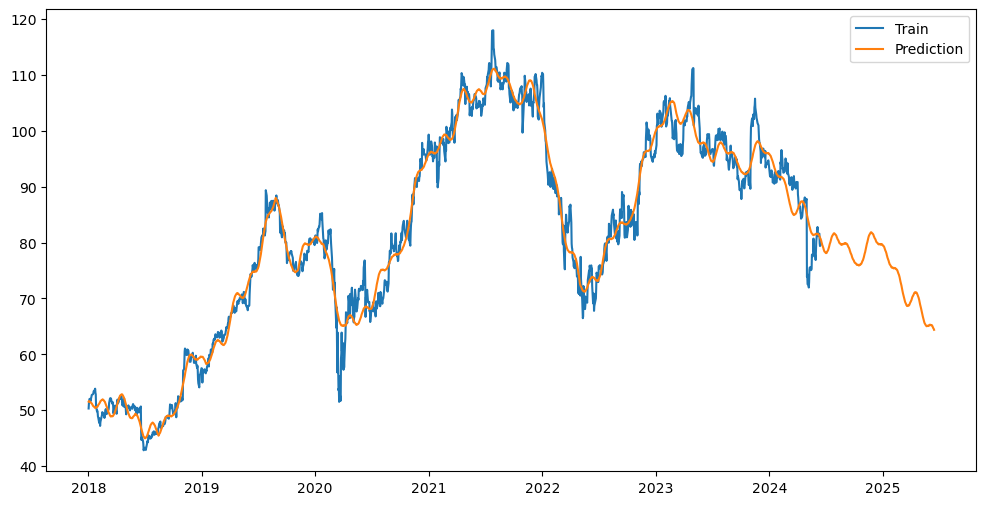

In [331]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

plt.plot(sbux_df[['y']], label='Train')
plt.plot(forecast_df[['yhat']], label='Prediction')
plt.legend()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\ProgramData\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


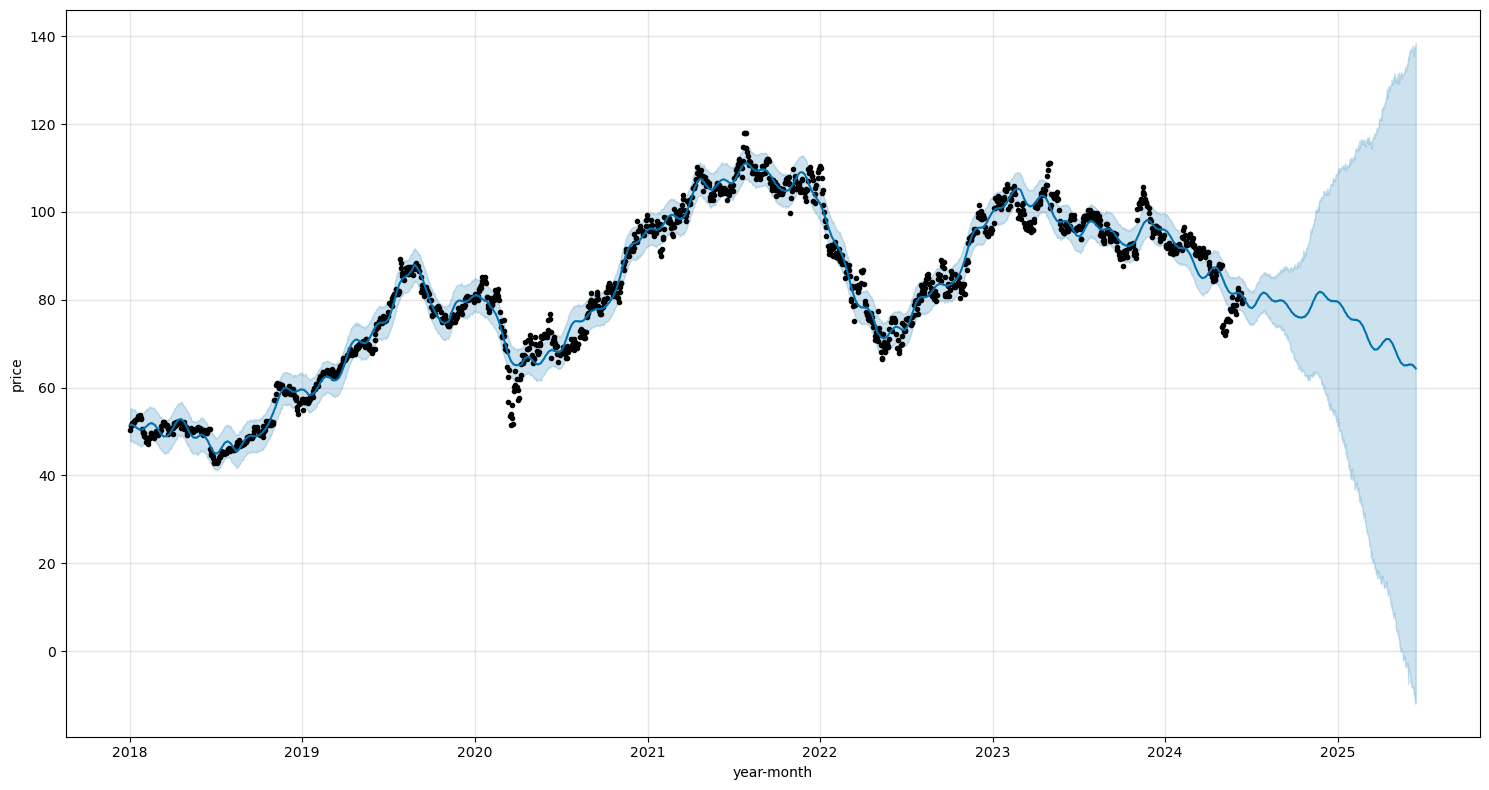

In [332]:
model.plot(forecast, figsize=(15, 8), xlabel='year-month', ylabel='price')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\ProgramData\anaconda3\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\ProgramData\anaconda3\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np

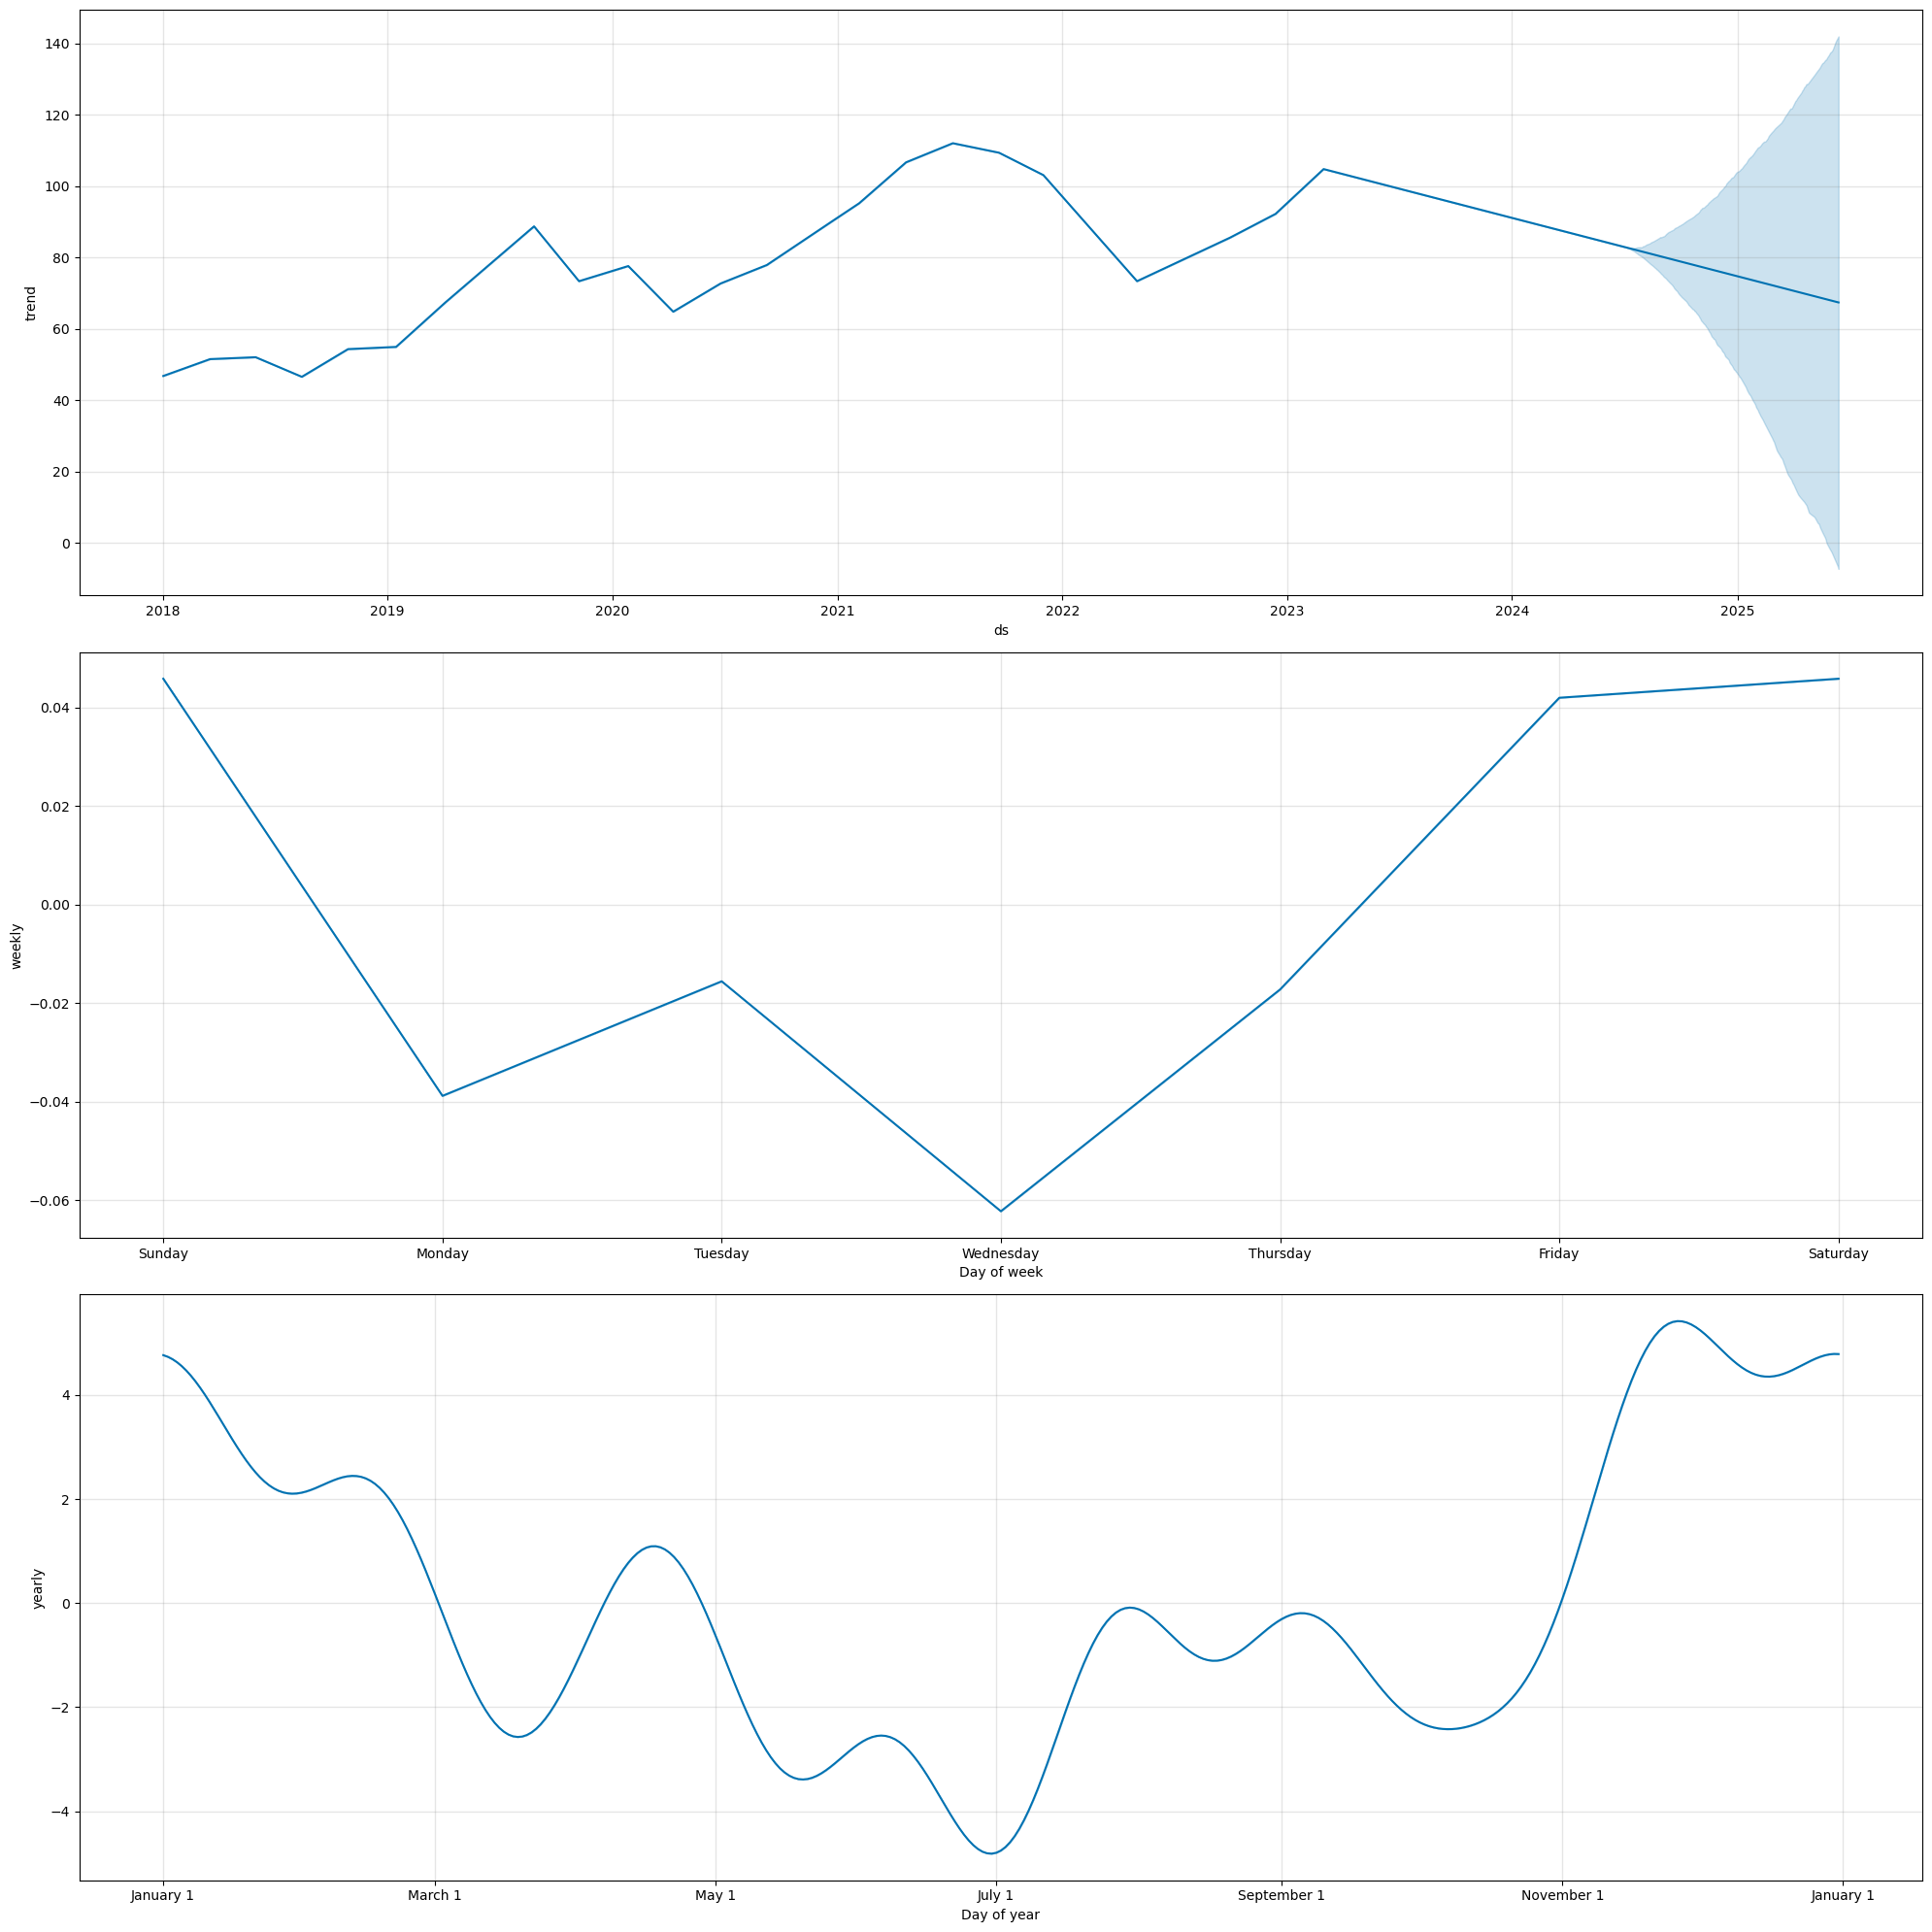

In [333]:
model.plot_components(forecast, figsize=(20, 20))
plt.show()

### 📍 예측 결과 분석
- 2019년부터 현재까지의 스타벅스 주식을 통해 향후 1년간의 주가를 예측해보았다.
- 코로나19로 인해 갑작스럽게 감소했던 2020년 상반기와 중동전쟁으로 인한 불매 운동으로 갑작스레 감소한 최근 2024년 상반기를 제외하고는
  대부분 신뢰구간안에 실제값이 들어가 있는 모델이 학습되었다.
- 해당 모델로 향후 1년의 주가를 예측해보니, 조금의 상승과 하강을 반복하지만 전체적으로는 소폭 감소하는 것으로 나타났다.
- Prophet 모델의 예측 결과를 구성하는 여러 요소들을 시각화하는 기능을 제공하는 plot_components() 메소드를 통해 추세(Trend), 연간 계절적 패턴(Yearly Seasonality), 주간 계절적 패턴(Weekly Seasonality)을 시각화하였다.
  > 시각화 그래프를 분석한 결과, 전체적으로 별 다른 추세를 나타나는 데이터가 아니며, 우연 변동 시계열임을 확인할 수 있었으며  
  > 향후 1년의 주가는 소폭 하락할 것이라 예상되지만 7월의 어느 수요일에 사고 12월의 어느 토요일에 파는 것이 가장 희망이 있어보인다.

### 향후 3년 예측

In [337]:
import yfinance as yf

columns = ['GLD', 'SBUX']

f_df = yf.download(columns, start='2018-01-01')['Adj Close'].round(5)
f_df

[*********************100%%**********************]  2 of 2 completed


Ticker,GLD,SBUX
Date,,
2018-01-02,125.15000,50.29491
2018-01-03,124.82000,51.23745
2018-01-04,125.46000,51.42944
2018-01-05,125.33000,52.02288
2018-01-08,125.31000,51.76108
...,...,...
2024-06-10,213.53999,81.60000
2024-06-11,214.14999,79.89000
2024-06-12,214.72000,79.38000


In [338]:
sbux_df = f_df[['SBUX']]
sbux_df

Ticker,SBUX
Date,
2018-01-02,50.29491
2018-01-03,51.23745
2018-01-04,51.42944
2018-01-05,52.02288
2018-01-08,51.76108
...,...
2024-06-10,81.60000
2024-06-11,79.89000
2024-06-12,79.38000


In [339]:
import pandas as pd

sbux_df.reset_index(inplace=True)

# Rename the 'Date' column to 'ds'
pre_sbux_df = sbux_df.rename(columns={'Date': 'ds'})
pre_sbux_df = pre_sbux_df.rename(columns={'SBUX': 'y'})

pre_sbux_df

Ticker,ds,y
0,2018-01-02,50.29491
1,2018-01-03,51.23745
2,2018-01-04,51.42944
3,2018-01-05,52.02288
4,2018-01-08,51.76108
...,...,...
1619,2024-06-10,81.60000
1620,2024-06-11,79.89000
1621,2024-06-12,79.38000
1622,2024-06-13,80.24000


In [340]:
train_df = pre_sbux_df.iloc[:int(len(pre_sbux_df) * 0.8)]
train_df

Ticker,ds,y
0,2018-01-02,50.29491
1,2018-01-03,51.23745
2,2018-01-04,51.42944
3,2018-01-05,52.02288
4,2018-01-08,51.76108
...,...,...
1294,2023-02-23,100.51894
1295,2023-02-24,98.66414
1296,2023-02-27,99.47987
1297,2023-02-28,99.13998


In [341]:
# 예측하고 싶은 기간을 적기
future = model.make_future_dataframe(periods=1095)

forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][1372:]

,ds,yhat,yhat_lower,yhat_upper
1372,2023-06-15,96.883963,93.173317,100.486927
1373,2023-06-16,96.766740,92.850889,100.192504
1374,2023-06-20,95.942861,92.338060,99.502622
1375,2023-06-21,95.702068,91.851698,99.370313
1376,2023-06-22,95.557440,91.847809,99.250288
...,...,...,...,...
2714,2027-06-10,32.281000,-394.750187,447.012268
2715,2027-06-11,32.230815,-397.771886,445.414832
2716,2027-06-12,32.109522,-394.374583,447.915099
2717,2027-06-13,31.969471,-395.933773,444.107711


In [342]:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
import itertools

# changepoint_prior_scale: trend의 변화하는 크기를 반영하는 정도이다, 0.05가 default
# seasonality_prior_scale: 계절성을 반영하는 단위이다.
# seasonality_mode: 계절성으로 나타나는 효과를 더해 나갈지, 곱해 나갈지 정한다.
search_space = {
    'changepoint_prior_scale': [0.05, 0.1, 0.5, 1.0 ,5.0, 10.0],
    'seasonality_prior_scale': [0.05, 0.1, 1.0, 10.0],
    'seasonality_mode': ['additive', 'multiplicative']
}

# print(*search_space.values())
# unpacking 하여 경우의 수 조합을 할 수 있게 진행
# itertools.product(): 각 요소들의 모든 경우의 수 조합으로 생성
param_combinded = [dict(zip(search_space.keys(), v)) for v in itertools.product(*search_space.values())]

train_len = int(len(pre_sbux_df) * 0.8)
test_len = int(len(pre_sbux_df) * 0.2)

train_size = f'{train_len} days'
test_size = f'{test_len} days'
train_df = pre_sbux_df.iloc[:train_len]
test_df = pre_sbux_df.iloc[test_len:]

mapes = []
for param in param_combinded:
    model = Prophet(**param)
    model.fit(train_df)

    # 'threads' 옵션은 메모리 사용량은 낮지만 CPU 바운드 작업에는 효과적이지 않을 수 있다.
    # 'dask' 옵션은 대규모의 데이터를 처리하는 데 효과적이다.
    # 'processes' 옵션은 각각의 작업을 별도의 프로세스로 실행하기 때문에 CPU 바운드 작업에 효과적이지만,
    # 메모리 사용량이 높을 수 있다.
    # period: 어느정도의 기간으로 교차검증을 할지
    cv_df = cross_validation(model, initial=train_size, period='20 days', horizon=test_size, parallel='processes')
    df_p = performance_metrics(cv_df, rolling_window=1)
    mapes.append(df_p['mape'].values[0])

tuning_result = pd.DataFrame(param_combinded)
tuning_result['mape'] = mapes

15:56:29 - cmdstanpy - INFO - Chain [1] start processing
15:56:30 - cmdstanpy - INFO - Chain [1] done processing
15:56:33 - cmdstanpy - INFO - Chain [1] start processing
15:56:33 - cmdstanpy - INFO - Chain [1] done processing
15:56:36 - cmdstanpy - INFO - Chain [1] start processing
15:56:36 - cmdstanpy - INFO - Chain [1] done processing
15:56:39 - cmdstanpy - INFO - Chain [1] start processing
15:56:40 - cmdstanpy - INFO - Chain [1] done processing
15:56:42 - cmdstanpy - INFO - Chain [1] start processing
15:56:43 - cmdstanpy - INFO - Chain [1] done processing
15:56:46 - cmdstanpy - INFO - Chain [1] start processing
15:56:46 - cmdstanpy - INFO - Chain [1] done processing
15:56:51 - cmdstanpy - INFO - Chain [1] start processing
15:56:51 - cmdstanpy - INFO - Chain [1] done processing
15:56:54 - cmdstanpy - INFO - Chain [1] start processing
15:56:55 - cmdstanpy - INFO - Chain [1] done processing
15:56:59 - cmdstanpy - INFO - Chain [1] start processing
15:56:59 - cmdstanpy - INFO - Chain [1]

In [343]:
tuning_result.sort_values(by='mape')

,changepoint_prior_scale,seasonality_prior_scale,seasonality_mode,mape
22,0.50,10.00,additive,0.316577
18,0.50,0.10,additive,0.317438
20,0.50,1.00,additive,0.317604
24,1.00,0.05,additive,0.317662
16,0.50,0.05,additive,0.317685
17,0.50,0.05,multiplicative,0.319946
19,0.50,0.10,multiplicative,0.320226
30,1.00,10.00,additive,0.320272
28,1.00,1.00,additive,0.320897
7,0.05,10.00,multiplicative,0.322468


In [345]:
model = Prophet(changepoint_prior_scale=0.5, 
                seasonality_prior_scale=10.0, 
                seasonality_mode='additive')

model.fit(pre_sbux_df)
future = model.make_future_dataframe(periods=1095)

forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][1372:]

16:01:30 - cmdstanpy - INFO - Chain [1] start processing
16:01:31 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
1372,2023-06-15,96.884215,93.294854,100.551530
1373,2023-06-16,96.766126,93.493970,100.492823
1374,2023-06-20,95.940907,92.156594,99.318710
1375,2023-06-21,95.701154,92.157043,99.245877
1376,2023-06-22,95.556294,92.031481,99.231205
...,...,...,...,...
2714,2027-06-10,32.271868,-375.908048,427.480479
2715,2027-06-11,32.220866,-376.540285,429.810185
2716,2027-06-12,32.691386,-375.405217,432.213608
2717,2027-06-13,32.551200,-376.887678,430.118802


In [346]:
sbux_df = pre_sbux_df.copy()
sbux_df.set_index('ds', inplace=True)

forecast_df = forecast.copy()
forecast_df = forecast_df.set_index('ds')

sbux_df.index = pd.to_datetime(sbux_df.index)
forecast_df.index = pd.to_datetime(forecast_df.index)

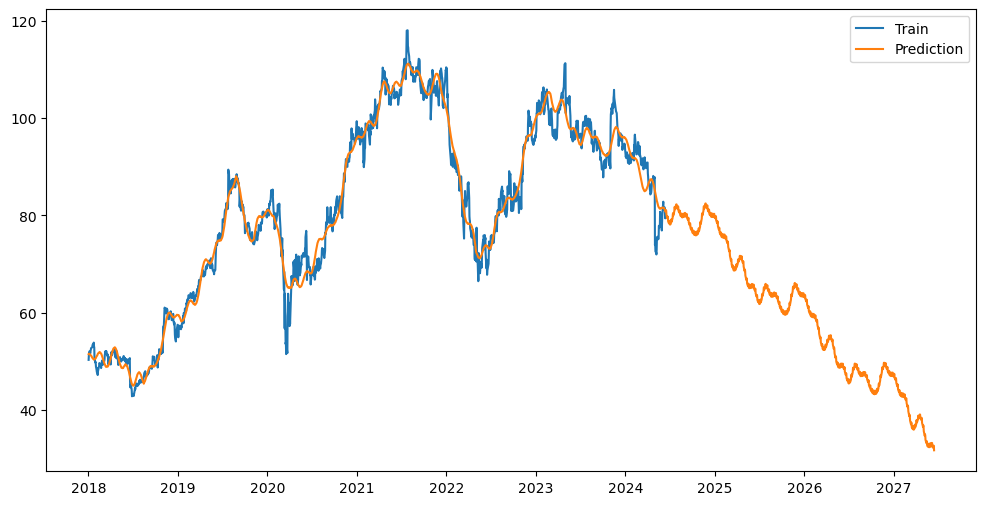

In [347]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

plt.plot(sbux_df[['y']], label='Train')
plt.plot(forecast_df[['yhat']], label='Prediction')
plt.legend()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\ProgramData\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


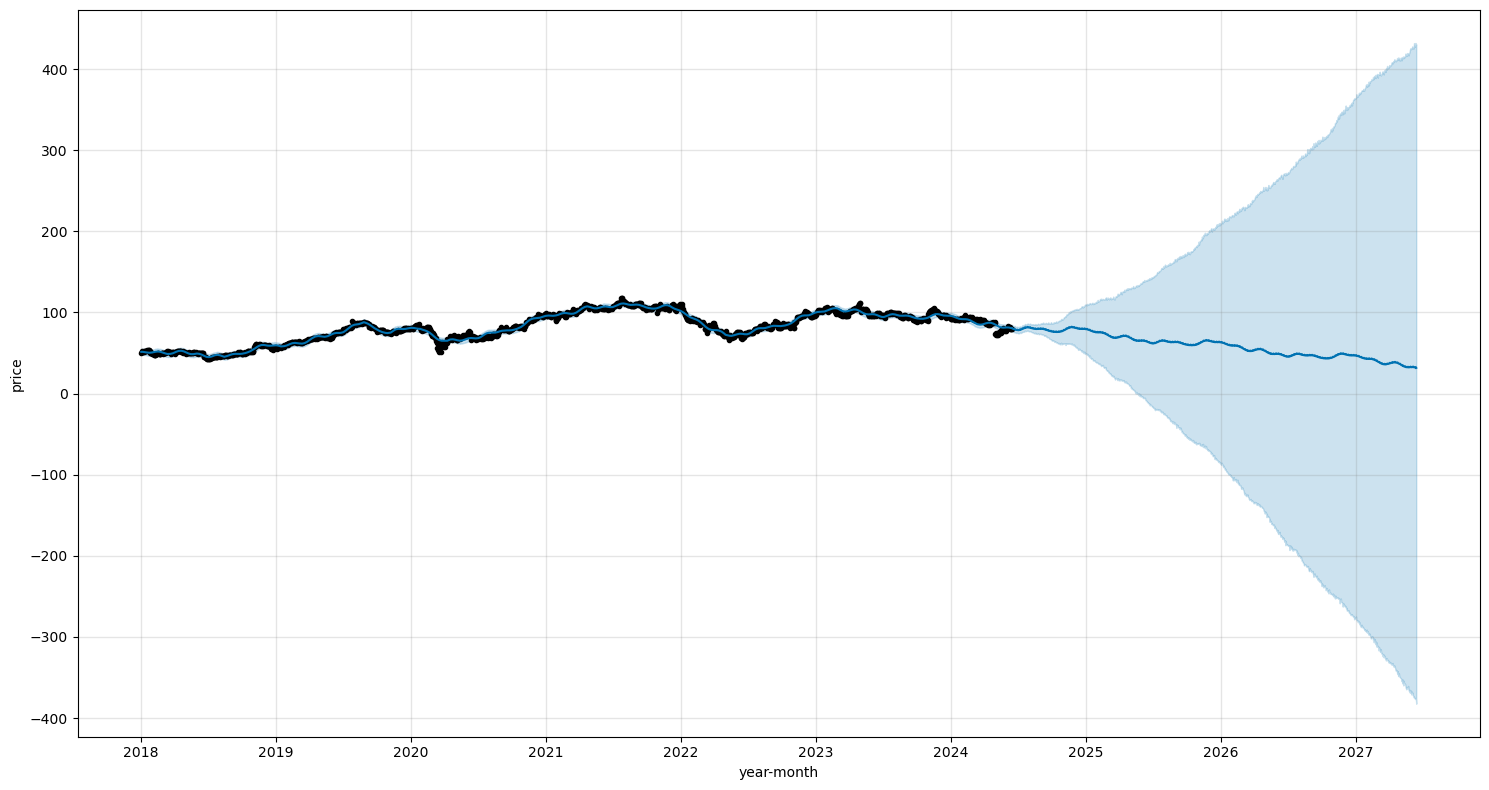

In [348]:
model.plot(forecast, figsize=(15, 8), xlabel='year-month', ylabel='price')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\ProgramData\anaconda3\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\ProgramData\anaconda3\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np

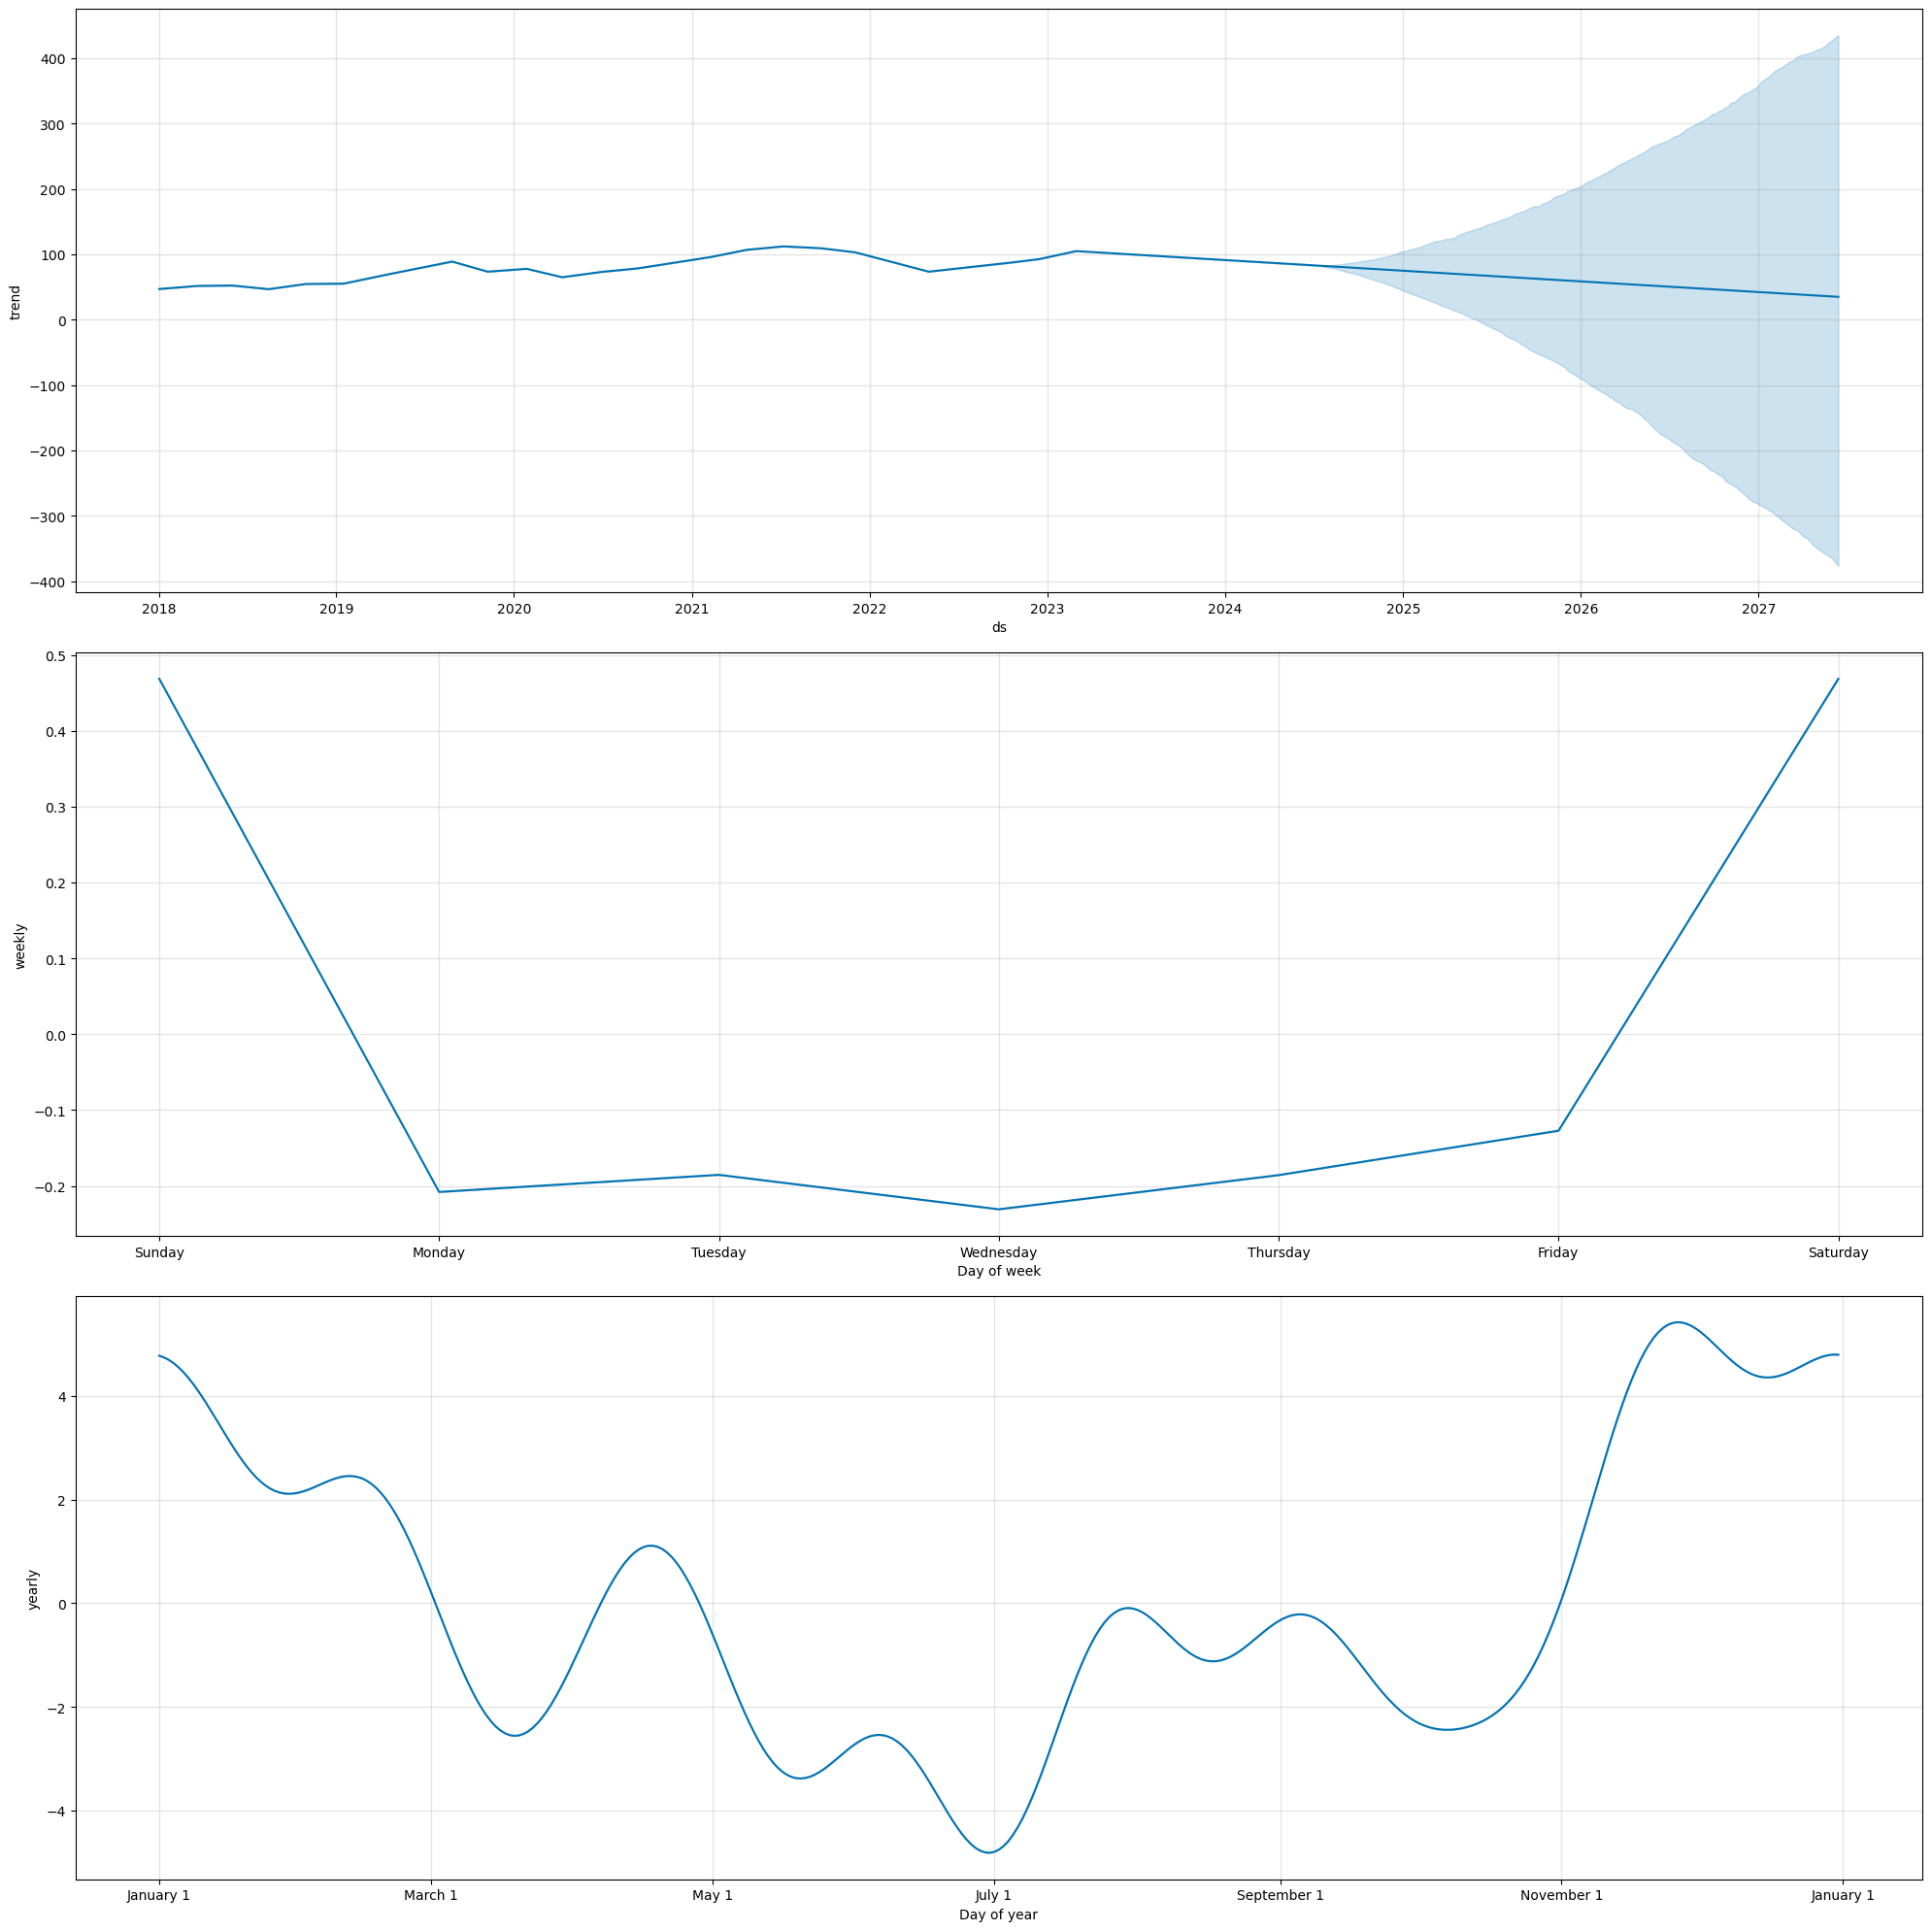

In [349]:
model.plot_components(forecast, figsize=(20, 20))
plt.show()